In [1]:
import glob
import scipy.io
import os
import scipy.stats
import time
%load_ext autoreload
%autoreload 2

In [2]:
import sklearn.neighbors
from scipy.cluster.vq import whiten
from scipy.sparse import csr_matrix, find
import scipy.io

In [3]:
import sys
sys.path.append('/Users/rsingh/Oyla/Work/our_python_dev/')
from oyla.mvc.filters import *

In [4]:
import open3d as o3d
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from oyla.utils import *
from oyla.mvc.utils import *

In [12]:
dir_path='/Volumes/Samsung_T5/Backup//Oyla/02 Technical/'+'10 Data/44x33/oyla_1_camera_v2/Office_indoors_March_10_11_02_09//'

In [13]:
input_data_folder_name =  dir_path
csv_file = input_data_folder_name+'/parameters.csv'
parameters = read_csv_parameters(csv_file)
filter_params = {}
ambiguity_distance, range_max, range_min, saturation_flag, adc_flag, mod_freq, ampl_min,reflectivity_thresh = some_common_utility(parameters,0)
reflectivity_thresh=0

dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])


In [28]:
filter_params = {}
filter_parameters = {}
filter_parameters['filter_cmd'] = {}
filter_parameters = read_csv_parameters("/Users/rsingh/Oyla/Work/our_python_dev/oyla/mvc/filter_params_spatialMedian_edge.csv")
for k in filter_parameters['filter_cmd'].keys():
        #print(parameters['filter_cmd'][k][self.epoch_number])
        try:
                filter_params[k] = int(filter_parameters['filter_cmd'][k][0])
                #parameters['filter_cmd'][k][0] = filter_parameters['filter_cmd'][k][0]
        except ValueError:
                pass
#filter_params = {}

dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])


In [29]:
#filter_params['median_filter'] = 0
#filter_params['edge_detection'] = 0

In [30]:
index = np.random.randint(0,300)
#index = 0
index = 20
print(index)
pcd = o3d.io.read_point_cloud(os.path.join(dir_path,'kitti/')+'/3d/oyla_'+str(index).zfill(4)+'.xyz',format='xyz')
pcd_f = o3d.io.read_point_cloud(os.path.join(dir_path,'kitti/')+'/3d/oyla_'+str(index+1).zfill(4)+'.xyz',format='xyz')
data = scipy.io.loadmat(dir_path+'/data_1_'+str(index)+'.mat')['data']
data2 = scipy.io.loadmat(dir_path+'/data_1_'+str(index+1)+'.mat')['data']
rgb = data2[0][4]
raw_phase = data[0][2][0][0][:,:,0]
raw_ampl = data[0][2][0][0][:,:,1]
print(raw_phase.shape,rgb.shape)
rgb,raw_phase,raw_ampl = camera_calibrations(rgb,depth=raw_phase,ampl=raw_ampl,camera_version='oyla_1_camera_v3_dus')
#raw_phase = cv2.resize(raw_phase,(512,64))
#raw_ampl = cv2.resize(raw_ampl,(512,64))
#_rgb = cv2.resize(rgb,None,fx=120/212,fy=120/212)
#range_min = 500
#range_max = range_max-range_min
filtered_phase, thresholded_ampl, indices = threshold_filter(raw_phase = raw_phase, raw_ampl = raw_ampl, reflectivity_thresh= reflectivity_thresh,
                                                            range_max = range_max, range_min = range_min, ampl_min = ampl_min,
                                                            filter_params = filter_params, ambiguity_distance = ambiguity_distance,qp_phase=None, qp_ampl=None)
#filtered_phase = np.rot90(filtered_phase)
#thresholded_ampl = np.rot90(thresholded_ampl)
_filtered_phase = filtered_phase.astype('float32')/np.max(filtered_phase)
_thresholded_ampl = thresholded_ampl.astype('float32')/np.max(thresholded_ampl)
_rgb = cv2.resize(rgb,(_filtered_phase.shape[1],_filtered_phase.shape[0]))
_rgb = _rgb.astype('float32')/255.0

20
(160, 120) (360, 640, 3)
version 3
(360, 588, 3) (360, 588) (360, 588)
Doing wavelet GraceVet filtering
Doing median filtering
(1434,) (2028,) 2.6640459e-05
(559,) (839,) 6.610018e-07
(234,) (463,) 1.9853995e-07
Doing median filtering
(80,) (62,) 0.0003050034
(2,) (2,) 7.470974e-07
(0,) (2,) 4.158432e-07


In [31]:
rgb.shape

(360, 588, 3)

In [32]:
np.std(raw_phase[np.where(raw_phase<65000)])

5286.16854414274

(-0.5, 587.5, 359.5, -0.5)

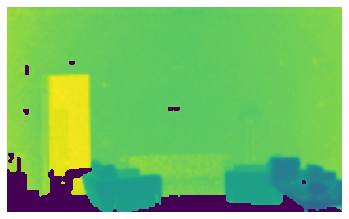

In [33]:
plt.imshow(filtered_phase)
plt.axis('off')

(array([15086.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   260.,   199.,   143.,   375.,   277.,   222.,   255.,
          256.,   250.,   842.,  1273.,   678.,   624.,   614.,   413.,
          289.,   306.,   282.,   185.,   179.,  1092.,  2487.,  2315.,
         3551.,  1621.,   784.,   642.,   553.,   471.,   463.,   577.,
          417.,   346.,   271.,   189.,   198.,   187.,   192.,   157.,
          276.,   444., 19937., 43351., 23464., 14888., 11856., 15355.,
        11767.,  6844.,  5275.,  3371.,  1373.,   752.,   363.,   202.,
          139.,   166.,   143.,   187.,   249.,   430.,   645.,  2211.,
         1865.,  5171.,  1343.,    92.]),
 array([   0.     ,   73.73716,  147.47432,  221.21147,  294.94864,
         368.6858 ,  442.4

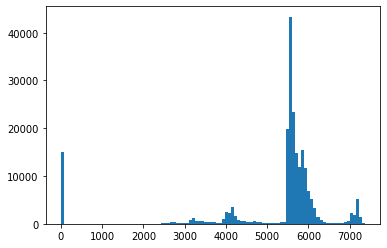

In [35]:
plt.hist(filtered_phase.reshape(-1),100)

In [46]:
D= scipy.io.loadmat('/Volumes/Samsung_T5/Oyla Dropbox/Oyla_Data/10 Data/Divya/Calibration Oct 11/still_data_October_11_14_48_57/phase_ampl_mat/oyla_0484.mat')

(array([1.200e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 9.000e+00, 3.700e+01, 4.400e+01, 3.800e+01,
        3.100e+01, 2.600e+01, 2.000e+01, 2.200e+01, 1.200e+01, 2.200e+01,
        3.000e+01, 2.600e+01, 2.000e+01, 3.100e+01, 2.600e+01, 2.800e+01,
        3.400e+01, 3.600e+01, 2.700e+01, 2.800e+01, 5.300e+01, 1.680e+02,
        1.850e+02, 1.170e+02, 2.710e+02, 1.450e+02, 8.900e+01, 1.480e+02,
        1.980e+02, 1.700e+02, 1.720e+02, 1.540e+02, 1.550e+02, 1.560e+02,
        1.920e+02, 2.470e+02, 2.750e+02, 2.680e+02, 2.700e+02, 2.510e+02,
        2.180e+02, 2.880e+02, 2.770e+02, 3.510e+02, 3.420e+02, 3.740e+02,
        1.130e+03, 4.059e+03, 2.368e+03, 1.693e+03, 1.305e+03, 9.640e+02,
        3.000e+02, 3.700e+01, 2.700e+0

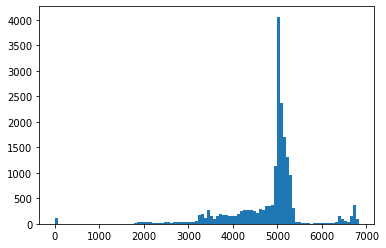

In [52]:
_phase = D['data'][0][2][0][0][:,:,0].astype('float')
_phase[_phase>30000] = 0
plt.hist(_phase.reshape(-1),100)

(array([1.2000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0400e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.7300e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.2500e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.1830e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.3420e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.9460e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.1304e+04, 0.0000e+00, 0.00

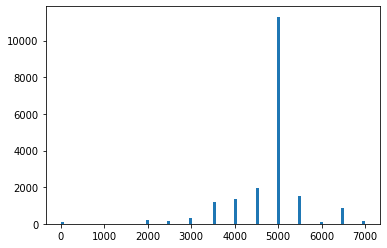

In [66]:
_phaseQ = np.round(_phase/500)*500
plt.hist(_phaseQ.reshape(-1),100)

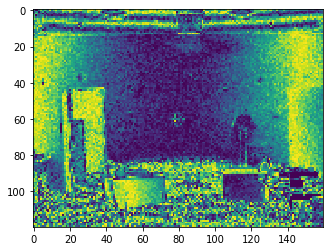

In [67]:
plt.imshow(np.rot90(np.abs(_phase-_phaseQ)))

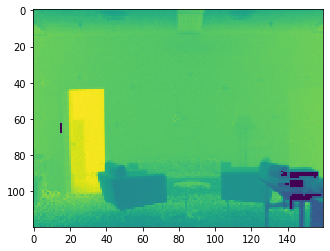

In [61]:
plt.imshow(np.rot90(_phase))

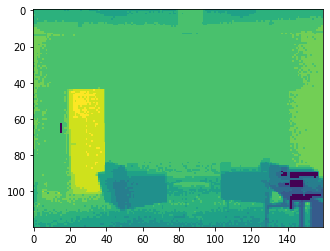

In [68]:
plt.imshow(np.rot90(_phaseQ))

In [25]:
plt.imsave('/Users/rsingh/Downloads/test.png',rgb)

In [23]:
data = raw_phase[:,:,np.newaxis]
np.stack((raw_phase,raw_ampl),axis=2).shape

(360, 588, 2)

In [24]:
print(filtered_phase.dtype)
_fp = cv2.medianBlur(cv2.medianBlur(cv2.medianBlur(filtered_phase,3),3),3)

float32


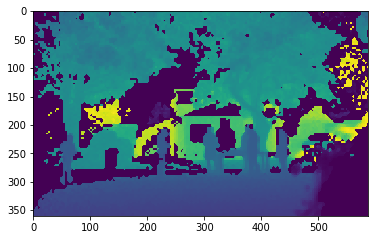

In [25]:
plt.imshow(_fp)

np.max(_fp)

In [26]:
cv2.imwrite('/Users/rsingh/Downloads/phase_org.png',filtered_phase.astype('uint16'))
cv2.imwrite('/Users/rsingh/Downloads/phase_filt.png',_fp.astype('uint16'))

True

In [20]:
_rgb = cv2.resize(rgb,None,fx=4,fy=4)

In [17]:
frgb = cv2.medianBlur(cv2.medianBlur(cv2.medianBlur(_rgb.astype('float32')/255,3),3),3)

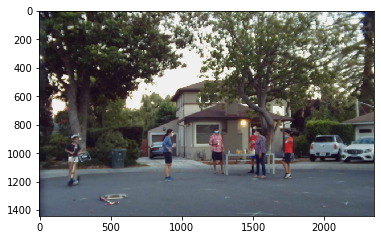

In [18]:
plt.imshow(frgb)

In [19]:
cv2.imwrite('/Users/rsingh/Downloads/rgb_org.png',_rgb.astype('float32'))
cv2.imwrite('/Users/rsingh/Downloads/rgb_filt.png',frgb.astype('float32')*255)

True

In [30]:
_filtered_phase = cv2.resize(filtered_phase,None,fx=4,fy=4)

In [31]:
_fp = cv2.medianBlur(cv2.medianBlur(cv2.medianBlur(_filtered_phase,3),3),3)

In [32]:
cv2.imwrite('/Users/rsingh/Downloads/phase_org.png',_filtered_phase.astype('uint16'))
cv2.imwrite('/Users/rsingh/Downloads/phase_filt.png',_fp.astype('uint16'))

True

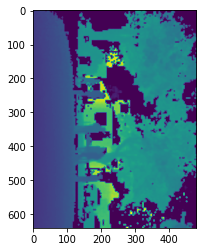

In [33]:
plt.imshow(_fp)

In [82]:
quantized_phase = np.uint16(filtered_phase/128)*128

In [83]:
np.max(quantized_phase)

29824

In [84]:
_qfp = cv2.medianBlur(cv2.medianBlur(cv2.medianBlur(quantized_phase.astype('float32'),3),3),3)

In [85]:
_qfp.dtype

dtype('float32')

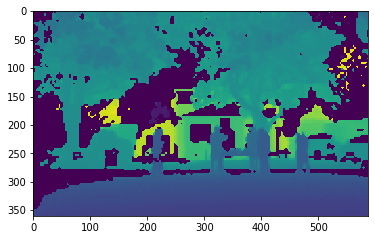

In [86]:
plt.imshow(_qfp)

In [32]:
np.max(_rgb)

0.99607843

In [63]:
bil_rgb = cv2.bilateralFilter(_rgb, -1, sigmaSpace = 1, sigmaColor = 1000)
bil_rgb.dtype

dtype('float32')

In [64]:
np.mean((bil_rgb-_rgb)**2)

0.0008040419

In [26]:
bil_rgb = cv2.bilateralFilter(rgb, -1, sigmaSpace = 10, sigmaColor = 1)

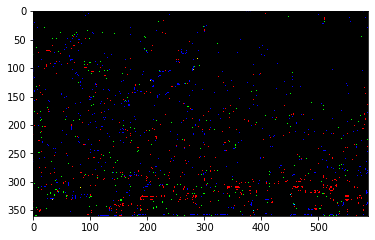

In [27]:
plt.imshow(bil_rgb-rgb)

In [28]:
bil_rgb = cv2.bilateralFilter(rgb, -1, sigmaSpace = 10, sigmaColor = 10)

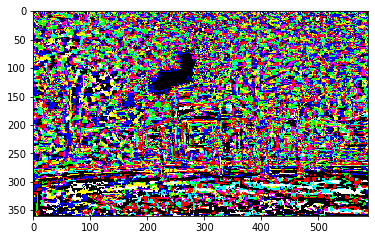

In [29]:
plt.imshow(bil_rgb-rgb)

In [66]:
from skimage.restoration import denoise_bilateral
from skimage import img_as_float

In [75]:
bil_rgb = denoise_bilateral(img_as_float(rgb),win_size = 13, multichannel=True)

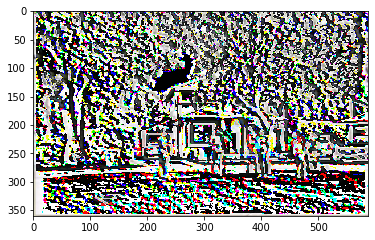

In [78]:
plt.imshow(img_as_ubyte(bil_rgb)-rgb)

In [145]:
fp = filtered_phase/30000
print(np.std(fp))
bil_fp = denoise_bilateral(fp, win_size = None,sigma_color = None, sigma_spatial=0.6)

0.24268463


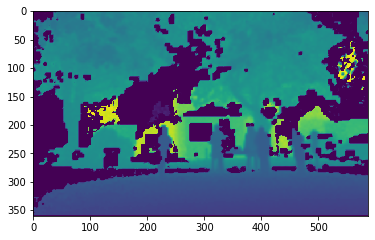

In [146]:
plt.imshow(bil_fp)

0.004269235


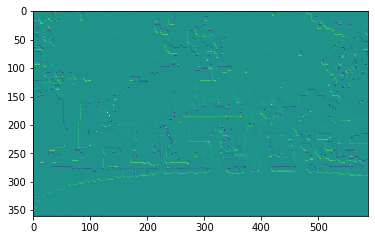

In [147]:
plt.imshow(bil_fp-fp)
print(np.mean((bil_fp-fp)**2))

In [107]:
import pywt

In [108]:
coeff = pywt.wavedec2(fp,'db5',level=3)
sigma = np.median(np.abs(coeff[2][2]))/0.6745

In [109]:
sigma

0.00389756460855677

In [123]:
max(5, 2 * np.ceil(3 * 0.6) + 1)

5

In [148]:
d = {}

In [149]:
d['0.1,0.1'] = 0.0006854709

In [155]:
d['0.3,0.1'] = 0.0006480531
d['0.5,0.1'] = 0.00032475236
d['0.7,0.1'] = 0.0002536209
d['0.9,0.1'] = 0.00016383636

d['0.1,0.5'] = 0.0006749397
d['0.1,0.9'] = 0.0006747444

d['0.6,0.05'] = 3.3655717e-5
d['0.6,0.08'] = 0.00013461564
d['0.6,0.09'] = 0.00018147616
d['0.6,0.1'] = 0.00023165095
d['0.6,0.15'] = 0.00038154295
d['0.6,0.3'] = 0.00048435957
d['0.6,0.6'] = 0.0005096508
d['0.6,1.0'] = 0.0005157433

In [156]:
d

{'0.1,0.1': 0.0006854709,
 '0.3,0.1': 0.0006480531,
 '0.5,0.1': 0.00032475236,
 '0.7,0.1': 0.0002536209,
 '0.9,0.1': 0.00016383636,
 '0.1,0.5': 0.0006749397,
 '0.1,0.9': 0.0006747444,
 '0.6,0.05': 3.3655717e-05,
 '0.6,0.08': 0.00013461564,
 '0.6,0.09': 0.00018147616,
 '0.6,0.1': 0.00023165095,
 '0.6,0.15': 0.00038154295,
 '0.6,0.3': 0.00048435957,
 '0.6,0.6': 0.0005096508,
 '0.6,1.0': 0.0005157433}

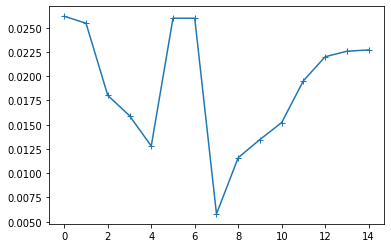

In [159]:
plt.plot(np.sqrt(list(d.values())),'-+')